# Sponsorships on YouTube Videos

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("ggplot")

## Quick analysis of the channels

In [2]:
# Read the data containing the information about the channels
df = pd.read_csv("data/df_channels_en.tsv.gz", sep="\t", parse_dates=["join_date"])

In [3]:
df.head(10)

,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights
0,Gaming,2010-04-29,UC-lHJZR3Gqxm24_Vd_AJ5Yw,PewDiePie,101000000,3956,3.0,2.087
1,Education,2006-09-01,UCbCmjCuTUZos6Inko4u57UQ,Cocomelon - Nursery ...,60100000,458,7.0,2.087
2,Entertainment,2006-09-20,UCpEhnqL0y41EpW2TvWAHD7Q,SET India,56018869,32661,8.0,2.087
3,Howto & Style,2016-11-15,UC295-Dw_tDNtZXFeAPAW6Aw,5-Minute Crafts,60600000,3591,9.0,2.087
4,Sports,2007-05-11,UCJ5v_MCY6GNUBTO8-D3XoAg,WWE,48400000,43421,11.0,2.087
5,Entertainment,2007-01-15,UCIwFjwMjI0y7PDBVEO9-bkQ,Justin Bieber,46574085,134,12.0,2.087
6,Music,2014-03-12,UCFFbwnve3yF62-tVXkTyHqg,Zee Music Company,43451109,4241,13.0,2.087
7,Sports,2009-03-17,UCRijo3ddMTht_IHyNSNXpNQ,Dude Perfect,45800000,213,14.0,2.087
8,Entertainment,2015-05-12,UCk8GzjMOrta8yxDcKfylJYw,✿ Kids Diana Show,34700000,599,16.0,2.087
9,Music,2006-08-08,UC0C-w0YjGpqDXGB8IHb662A,Ed Sheeran,42000000,154,17.0,2.087


In [4]:
df.describe()

,subscribers_cc,videos_cc,subscriber_rank_sb,weights
count,1.364700e+05,136470.000000,1.364700e+05,136470.000000
mean,2.466022e+05,699.784231,3.570087e+05,7.349363
std,1.150096e+06,4524.980928,2.711139e+05,5.277328
min,1.000000e+04,10.000000,3.000000e+00,2.086500
25%,1.888575e+04,70.000000,1.161305e+05,4.231500
50%,4.240000e+04,175.000000,3.015670e+05,6.444000
75%,1.370000e+05,443.000000,5.704942e+05,9.243500
max,1.121395e+08,461923.000000,1.030844e+06,53.150500


### Number of subscribers per channel category

In [5]:
df_channels = df.copy()
df_channels = df_channels.sort_values(ascending=False, by='subscribers_cc')
df_channels

,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights
55,Music,2006-03-13,UCq-Fj5jknLsUf-MWSy4_brA,T-Series,112139463,13839,102.0,2.0870
0,Gaming,2010-04-29,UC-lHJZR3Gqxm24_Vd_AJ5Yw,PewDiePie,101000000,3956,3.0,2.0870
3,Howto & Style,2016-11-15,UC295-Dw_tDNtZXFeAPAW6Aw,5-Minute Crafts,60600000,3591,9.0,2.0870
1,Education,2006-09-01,UCbCmjCuTUZos6Inko4u57UQ,Cocomelon - Nursery ...,60100000,458,7.0,2.0870
2,Entertainment,2006-09-20,UCpEhnqL0y41EpW2TvWAHD7Q,SET India,56018869,32661,8.0,2.0870
...,...,...,...,...,...,...,...,...
121216,Music,2006-09-04,UCB3ljzBbe82wEYhQ9-GPwhQ,Sahel Sounds,10000,467,755753.0,11.7300
133570,People & Blogs,2014-03-15,UCfC3fUm0U-76SrWu1cFhYkA,The 0utsyder,10000,173,910756.0,15.3665
120916,Gaming,2017-08-23,UCEi5bJ5J0dnbbL_SWyKQm1g,The Artist Mark Flyn...,10000,23,753223.0,11.5655
136041,Sports,2013-12-20,UCnxfGnzBIMhDXFoALFEgw2Q,UR Team,10000,135,965611.0,53.1435


Text(0, 0.5, 'Channel category')

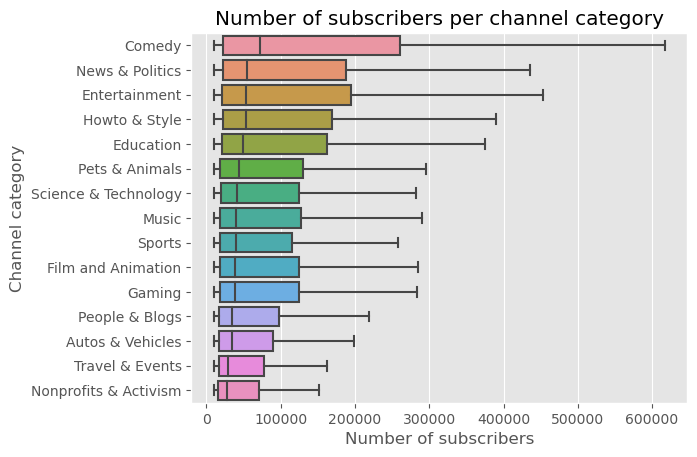

In [6]:
# Order the channels by the number of subscribers per category
grouped = (
    df.loc[:, ["category_cc", "subscribers_cc"]]
    .groupby("category_cc")
    .median()
    .sort_values(by="subscribers_cc", ascending=False)
)

# Plot the categories
sns.boxplot(
    data=df,
    x=df.subscribers_cc,
    y=df.category_cc,
    order=grouped.index,
    showfliers=False,
)
plt.title("Number of subscribers per channel category")
plt.xlabel("Number of subscribers")
plt.ylabel("Channel category")


In [7]:
df.groupby("category_cc").max("subscriber_cc")

,subscribers_cc,videos_cc,subscriber_rank_sb,weights
category_cc,,,,
Autos & Vehicles,6790000,82914,985789.0,53.1435
Comedy,24800000,22076,998847.0,53.1435
Education,60100000,118159,988795.0,53.1435
Entertainment,56018869,257188,1007560.0,53.1435
Film and Animation,29500000,125613,1007876.0,53.1435
Gaming,101000000,134606,1009505.0,53.1435
Howto & Style,60600000,332703,1005013.0,53.1435
Music,112139463,175300,1025119.0,53.1435
News & Politics,16274836,461923,978433.0,53.1435


In [8]:
df.join_date.min(), df.join_date.max()

(Timestamp('2004-09-16 00:00:00'), Timestamp('2019-08-23 00:00:00'))

In [9]:
df.join_date.sort_values()

59578    2004-09-16
70225    2005-04-29
96436    2005-05-03
104240   2005-05-04
36399    2005-06-13
            ...    
89391    2019-08-15
11734    2019-08-20
113301   2019-08-21
22653    2019-08-23
62              NaT
Name: join_date, Length: 136470, dtype: datetime64[ns]

The channel at index 62 is the channel of YouTube itself. It is interesting to note that the channel has no `join_date`.

In [10]:
df.iloc[62].head(65)

category_cc                      Entertainment
join_date                                  NaT
channel               UCBR8-60-B28hp2BmDPdntcQ
name_cc                                YouTube
subscribers_cc                        28200000
videos_cc                                  301
subscriber_rank_sb                       110.0
weights                                  2.087
Name: 62, dtype: object

### Channel with most subscribers

In [11]:
df.loc[df['subscribers_cc'].idxmax()]

category_cc                              Music
join_date                  2006-03-13 00:00:00
channel               UCq-Fj5jknLsUf-MWSy4_brA
name_cc                               T-Series
subscribers_cc                       112139463
videos_cc                                13839
subscriber_rank_sb                       102.0
weights                                  2.087
Name: 55, dtype: object

### Channel with most videos

In [12]:
df.loc[df["videos_cc"].idxmax()]

category_cc                    News & Politics
join_date                  2015-06-17 00:00:00
channel               UCHTK-2W11Vh1V4uwofOfR4w
name_cc                             AP Archive
subscribers_cc                         1770000
videos_cc                               461923
subscriber_rank_sb                      6059.0
weights                                 2.4625
Name: 2795, dtype: object